In [1]:
import pandas as pd
import numpy as np
import csv
from collections import Counter
# ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter

In [9]:
def kw_in_df(data, keyword):
    print("'", keyword, "' Í∞Ä Ìè¨Ìï®Îêú Î¶¨Î∑∞ Ï¥ù", len(data[data['ReviewText'].apply(lambda x:keyword in x)]['ReviewText']),'Í±¥')
    return data[data['ReviewText'].apply(lambda x:keyword in x)]['ReviewText']

In [10]:
def kw_in_nouns(data, keyword):
    print("'", keyword, "' Í∞Ä Ìè¨Ìï®Îêú Î¶¨Î∑∞ Ï¥ù", len(data[data['token_nouns_bareun'].apply(lambda x:keyword in x)]['ReviewText']),'Í±¥')
    return data[data['token_nouns_bareun'].apply(lambda x:keyword in x)]['ReviewText']

In [11]:
def frequency_analysis(data, n):
    words = pd.DataFrame(Counter(sum(data.to_list(), [])).most_common(n), columns = ['Token','Frequency'])
    return words

In [13]:
def wc_kw(data, kw_option, keyword):
    if kw_option == 1: # 1ÏùÄ Ïö©Ïñ∏ ÌÇ§ÏõåÎìú, 2Îäî Î™ÖÏÇ¨ ÌÇ§ÏõåÎìú
        print(keyword, 'ÌÇ§ÏõåÎìúÍ∞Ä Ìè¨Ìï®Îêú Î¶¨Î∑∞Ïùò Ïö©Ïñ∏ ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏãúÍ∞ÅÌôî')
        return wc_analysis(data[data['ReviewText'].apply(lambda x:keyword in x)]['token_verbs_bareun'])
    elif kw_option == 2:
        print(keyword, 'ÌÇ§ÏõåÎìúÍ∞Ä Ìè¨Ìï®Îêú Î¶¨Î∑∞Ïùò Î™ÖÏÇ¨ ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏãúÍ∞ÅÌôî')
        return wc_analysis(data[data['ReviewText'].apply(lambda x:keyword in x)]['token_nouns_bareun'])
    elif kw_option == 3:
        print(keyword, 'ÌÇ§ÏõåÎìúÍ∞Ä Ìè¨Ìï®Îêú Î¶¨Î∑∞Ïùò Ïö©Ïñ∏+Î™ÖÏÇ¨ ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏãúÍ∞ÅÌôî')
        return wc_analysis(data[data['ReviewText'].apply(lambda x:keyword in x)]['token_nouns_bareun'] + data[data['ReviewText'].apply(lambda x:keyword in x)]['token_verbs_bareun'])
    else:
        return print('ÏòµÏÖò ÌôïÏù∏')

In [84]:
# Î¶¨Î∑∞ Ï∂úÎ†•Ïãú ... ÏóÜÏù¥ Ï†ÑÎ∂Ä ÎÇòÏò§Í≤å ÏÑ§Ï†ï
pd.set_option('display.max_colwidth', None)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)

In [12]:
#ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú Ìï®Ïàò
def wc_analysis(data):
    words = dict(Counter(sum(data.to_list(), [])).most_common(300))
    #img = Image.open("C:/Users/NT550-048/Desktop/ÏûáÎçî/rice.jpg")
    #imgArray = np.array(img)
    wordcloud = WordCloud(font_path = 'C:/Windows/Fonts/malgun.ttf', background_color='black',colormap = "Accent_r",
                        width=800, height=500).generate_from_frequencies(words)
    plt.figure(figsize = (10, 10))
    plt.imshow(wordcloud) 
    plt.axis('off')
    plt.show()

In [2]:
kakao_data = pd.read_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\kakao_data_preprocessed.csv", index_col=0)

In [4]:
kakao_data.rename(columns = {'review_text':'ReviewText'}, inplace = True)

In [3]:
kakao_data.head(1)

id                                        name brand  sellingPrice  \
0  2270784  Íµ≠ÏÇ∞ ÌîÑÎ°úÌè¥Î¶¨Ïä§ ÌòºÌï© Ï≤úÏó∞Î≤åÍøÄ ÌóàÎãàÏä§Ìã±(15Ïä§Ìã±) ÎãµÎ°ÄÌíà ÎπÑÎßàÏä§ÌÑ∞ -23.5  ÎπÑÎßàÏä§ÌÑ∞         27800   

   wishCount  reviewCount product_tag2  \
0       2228         1152           []   

                                         review_text  rating review_tag1  \
0  ÏàôÏ∑®ÌõÑ ÏïÑÏπ®Ïóê Îî∞ÎúªÌïú Î¨ºÏóê ÌïúÌè¨ Í∞ÑÌé∏Ìûà ÌÉÄÎ®πÏùÑÏàò ÏûàÏñ¥ÏÑú Ï¢ãÎìúÎùºÍµ¨Ïöî. Ïä§Ìã±ÌòïÏù¥Îùº Ìú¥ÎåÄ...       4          ÏùëÏõê   

  review_tag2          review_time  sentiment_label  sentiment_score  \
0        ÏßÅÏû•ÎèôÎ£å  2023-04-10 14:16:48                1         0.990664   

                                  token_nouns_bareun  \
0  ['ÏàôÏ∑®', 'ÌõÑ', 'ÏïÑÏπ®', 'Î¨º', 'Ìè¨', 'Ïàò', 'Ïä§Ìã±', 'Ìòï', 'Ìú¥...   

                                  token_verbs_bareun  
0  ['Îî∞ÎúªÌïò', 'ÌÉÄ', 'Î®π', 'Ïûà', 'Ï¢ã', 'Ïù¥', 'Í∞ÑÌé∏Ìïò', 'ÎÖπ', '...

In [5]:
kakao_data['token_nouns_bareun'] = kakao_data['token_nouns_bareun'].apply(lambda x:eval(x))
kakao_data['token_verbs_bareun'] = kakao_data['token_verbs_bareun'].apply(lambda x:eval(x))

Î¶¨Î∑∞ ÌÉúÍ∑∏ Ï†ÑÏ≤òÎ¶¨

In [13]:
kakao_data['review_tag1'].value_counts()

review_tag1
ÏùëÏõê          739
ÏÉùÏùº          592
Í∞êÏÇ¨          188
ÏúÑÎ°ú          187
Í±¥Í∞ï           28
ÏÑ§ÎÇ†           16
Í≤∞Ìòº           15
ÏãúÌóò           15
Ïû¨ÎØ∏           14
Ï∑®ÏóÖ/Ïù¥ÏßÅ        12
Ïä§ÏäπÏùòÎÇ†         10
ÌÅ¨Î¶¨Ïä§ÎßàÏä§         9
Ï°∏ÏóÖ/ÏûÖÌïô         6
Ïñ¥Î≤ÑÏù¥ÎÇ†          4
ÌôîÏù¥Ìä∏Îç∞Ïù¥         4
ÎπºÎπºÎ°úÎç∞Ïù¥         4
ÏÉàÌï¥            4
ÏûÑÏã†/Ï∂úÏÇ∞         4
Ï∂îÏÑù            3
Î™ÖÏ†àÏÑ†Î¨º          3
Î™ÖÏ†à            3
ÏÑ†Î¨º            3
ÏΩîÎ°úÎÇò           2
ÏÑ†Î¨ºÏö©           2
Ï∂îÏÑùÏÑ†Î¨º          2
Ïù¥ÏÇ¨/ÏßëÎì§Ïù¥        2
Î∞úÎ†åÌÉÄÏù∏Îç∞Ïù¥        2
Í±¥Í∞ïÌöåÎ≥µ          2
ÏïÑÌîÑÏßÄÎßà          2
ÏæåÏú†            1
ÎπÑÎ∞Ä            1
ÌîºÎ°úÌöåÎ≥µ          1
Î™©Í∞êÍ∏∞ÏóêÏ¢ãÎã§Í≥†       1
Ïù∏Ïó∞            1
Î™©Í∞êÍ∏∞           1
ÏÑùÎ•òÍøÄÎßõÏµúÍ≥†Ïù¥Îã§      1
Ìì®Ïñ¥ÏÑùÎ•òÏïÑÏπ¥        1
Í±¥Í∞ïÏòÅÏñëÏÑùÎ•ò        1
Î©¥Ïó≠Î†•Ï±ôÍ∏∞Í∏∞        1
Í∞êÏÇ¨ÎßàÏùå          1
Ïó∞Îßê            1
ÍøÄÎπ†ÎäîÏãúÍ∞Ñ         1
ÌöåÎ≥µ        

In [8]:
kakao_data['review_tag2'].value_counts()

review_tag2
ÏπúÍµ¨          865
ÏßÅÏû•ÎèôÎ£å        350
ÏÑ†/ÌõÑÎ∞∞        209
ÌòïÏ†ú/ÏûêÎß§       121
ÎÇò            97
Ïó∞Ïù∏           76
ÏÑ†ÏÉùÎãò          44
Ï†úÏûê           37
ÏûêÎÖÄ           28
Î∂ÄÎ™®Îãò          26
Ïç∏            11
ÏßÄÏù∏            6
Ï°∞Ïπ¥            5
ÏπúÏ≤ô            2
Ïñ∏Îãà            2
Ïä§Ìä∏Î¶¨Î®∏          1
ÏÑ†Î¨º            1
ÍµêÌöåÏñ∏Îãà          1
ÌïëÌÅ¨Îãò           1
Í≤åÏûÑÎã®ÌÜ°Î∞©         1
Í∞êÏÇ¨Ìï©ÎãàÎã§         1
Í≥†ÎßàÏö¥Î∂Ñ          1
Ïó†ÏóêÏù¥ÏπòÍ∏ÄÎ°úÎπÑÏ¶à      1
ÏßÅÏû•            1
ÏïÑÎì§ÏπúÍµ¨Ïñ¥Î®∏Îãà       1
Í∑∏ÎÉ•ÏÑ†Î¨º          1
Í±∞ÎûòÏ≤òÏÑ†Î¨º         1
Ìì®Ïñ¥ÏÑùÎ•òÏïÑÏπ¥        1
ÎèôÍ∏∞            1
ÌïôÎ∂ÄÎ™®ÎãòÏÑ†Î¨º        1
ÏπúÍµ¨Îî∏           1
Î≥¥ÎÇ∏Ïù¥ÏùòÏ†ïÏÑ±        1
ÌôÄÏù∏ÏõêÍ∏∞ÎÖê         1
ÎÇòÏóêÍ≤åÏ£ºÎäîÏÑ†Î¨º       1
ÏÇºÏã§ÌÇ¨Î°úÎØ∏ÌÑ∞        1
Ï†ÑÎèÑÏÇ¨Îãò          1
ÌïôÎ∂ÄÎ™®Îãò          1
Í∞ÄÏ°±            1
ÏÉùÏùº            1
ÏùëÏõêÍ≥ºÍ±¥Í∞ïÍ∏∞Ïõê       1
Îî∏ÎÇ®ÏûêÏπúÍµ¨         1
Í±¥Í∞ï            1
ÏÉùÏùº

In [6]:
tag2 = ['ÏπúÍµ¨', 'Ïó∞Ïù∏', 'Ïç∏', 'ÌòïÏû¨/ÏûêÎß§', 'ÏÑ†/ÌõÑÎ∞∞', 'ÏßÅÏû•ÎèôÎ£å', 'ÏûêÎÖÄ', 'Î∂ÄÎ™®Îãò', 'Ï†úÏûê', 'ÏÑ†ÏÉùÎãò', 'ÎÇò']
tag1 = ['ÏÉùÏùº', 'ÏùëÏõê', 'Í∞êÏÇ¨', 'Ïû¨ÎØ∏', 'Í≤∞Ìòº', 'Ïù¥ÏÇ¨/ÏßëÎì§Ïù¥', 'Î∞±Ïùº/Îèå', 'ÏûÑÏã†/Ï∂úÏÇ∞', 'Ï°∏ÏóÖ/ÏûÖÌïô', 'Ï∑®ÏóÖ/Ïù¥ÏßÅ', 'ÏãúÌóò', 'ÏúÑÎ°ú', 'ÏÇ¨Í≥º', 'Î∞òÎ†§ÎèôÎ¨º', 'ÏÑ§ÎÇ†', 'Í±¥Í∞ï', 'Ïä§ÏäπÏùòÎÇ†']

In [7]:
kakao_data['review_tag1'] = kakao_data['review_tag1'].apply(lambda x:x if x in tag1 else 'Í∏∞ÌÉÄ')

In [8]:
kakao_data['review_tag2'] = kakao_data['review_tag2'].apply(lambda x:x if x in tag2 else 'Í∏∞ÌÉÄ')

In [36]:
kakao_data['review_tag1'].value_counts()

review_tag1
ÏùëÏõê        739
ÏÉùÏùº        592
Í∞êÏÇ¨        188
ÏúÑÎ°ú        187
Í∏∞ÌÉÄ         92
Í±¥Í∞ï         28
ÏÑ§ÎÇ†         16
ÏãúÌóò         15
Í≤∞Ìòº         15
Ïû¨ÎØ∏         14
Ï∑®ÏóÖ/Ïù¥ÏßÅ      12
Ïä§ÏäπÏùòÎÇ†       10
Ï°∏ÏóÖ/ÏûÖÌïô       6
ÏûÑÏã†/Ï∂úÏÇ∞       4
Ïù¥ÏÇ¨/ÏßëÎì§Ïù¥      2
Î∞±Ïùº/Îèå        1
ÏÇ¨Í≥º          1
Name: count, dtype: int64

In [35]:
kakao_data['review_tag2'].value_counts()

review_tag2
ÏπúÍµ¨      865
ÏßÅÏû•ÎèôÎ£å    350
ÏÑ†/ÌõÑÎ∞∞    209
Í∏∞ÌÉÄ      179
ÎÇò        97
Ïó∞Ïù∏       76
ÏÑ†ÏÉùÎãò      44
Ï†úÏûê       37
ÏûêÎÖÄ       28
Î∂ÄÎ™®Îãò      26
Ïç∏        11
Name: count, dtype: int64

In [14]:
plt.figure(figsize=(7,7))
plt.title('Kakao present who?' , fontsize=20)
plt.ylabel('who' , fontsize=15)
kakao_data['review_tag1'].value_counts().plot.pie(autopct = '%.2f%%' , 
                                                  textprops = {'fontsize' : 12 ,
                                                               'weight' : 'bold'})
plt.show()

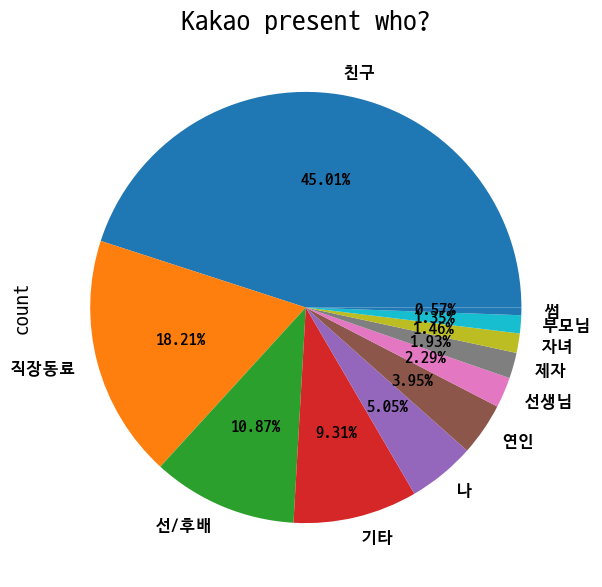

In [15]:
plt.figure(figsize=(7,7))
plt.title('Kakao present who?' , fontsize=20)
plt.ylabel('who' , fontsize=15)
kakao_data['review_tag2'].value_counts().plot.pie(autopct = '%.2f%%' , 
                                                  textprops = {'fontsize' : 12 ,
                                                               'weight' : 'bold'})
plt.show()

In [43]:
kakao_data.head(1)

id                                        name brand  sellingPrice  \
0  2270784  Íµ≠ÏÇ∞ ÌîÑÎ°úÌè¥Î¶¨Ïä§ ÌòºÌï© Ï≤úÏó∞Î≤åÍøÄ ÌóàÎãàÏä§Ìã±(15Ïä§Ìã±) ÎãµÎ°ÄÌíà ÎπÑÎßàÏä§ÌÑ∞ -23.5  ÎπÑÎßàÏä§ÌÑ∞         27800   

   wishCount  reviewCount product_tag2  \
0       2228         1152           []   

                                                                                                                                  review_text  \
0  ÏàôÏ∑®ÌõÑ ÏïÑÏπ®Ïóê Îî∞ÎúªÌïú Î¨ºÏóê ÌïúÌè¨ Í∞ÑÌé∏Ìûà ÌÉÄÎ®πÏùÑÏàò ÏûàÏñ¥ÏÑú Ï¢ãÎìúÎùºÍµ¨Ïöî. Ïä§Ìã±ÌòïÏù¥Îùº Ìú¥ÎåÄÎèÑÍ∞ÑÌé∏ÌïòÍ≥†  Î¨ºÏóêÎèÑ ÏûòÎÖπÏïÑÏöî. Ï£ºÎ®∏ÎãàÎÇò Í∞ÄÎ∞©ÏïàÏóê Ìú¥ÎåÄÌïòÍ∏∞ÎèÑÍ∞ÑÌé∏Ìï¥ÏÑú ÌóàÍ∏∞Ï°åÏùÑÎïå Í∞ÑÌé∏ÌïòÍ≤å ÎãπÏ∂©Ï†ÑÌïòÍ∏∞ÏóêÎèÑ ÎÑàÎ¨¥Ï¢ãÏäµÎãàÎã§. Íµ≠ÎÇ¥ÏÇ∞ÍøÄÏù¥Îùº ÎØøÏùÑÏàòÏûàÍ≥† ÎßõÎèÑÏ¢ãÏïÑÏöî. Î∞∞ÏÜ°ÏóÑÏ≤≠Îπ†Î•¥ÎÑ§Ïöî   

   rating review_tag1 review_tag2          review_time  sentiment_label  \
0       4          ÏùëÏõê        ÏßÅÏû•ÎèôÎ£å  2023-04-10 14:16:48                1   

   sentiment_score  \
0         0.990664   

                                                               token_nouns_bareun  \
0  [ÏàôÏ∑®, ÌõÑ, ÏïÑÏπ®, Î¨º, Ìè¨, Ïàò, Ïä§Ìã±, Ìòï, Ìú¥ÎåÄ, Î¨º, Ï£ºÎ®∏Îãà, Í∞ÄÎ∞©, Ïïà, Ìú¥ÎåÄ, Îïå, Îãπ, Ï∂©Ï†Ñ, Íµ≠ÎÇ¥, ÏÇ∞ÍøÄ, Ïàò, Îßõ, Î∞∞ÏÜ°]   

                                                     token_verbs_bareun  
0  [Îî∞ÎúªÌïò, ÌÉÄ, Î®π, Ïûà, Ï¢ã, Ïù¥, Í∞ÑÌé∏Ìïò, ÎÖπ, Ìïò, Í∞ÑÌé∏Ìïò, ÌóàÍ∏∞ÏßÄ, Í∞ÑÌé∏Ìïò, Ìïò, Ï¢ã, Ïù¥, ÎØø, Ïûà, Ï¢ã, Îπ†Î•¥]

In [47]:
kakao_noun_frequency = frequency_analysis(kakao_data['token_nouns_bareun'], 500)

In [48]:
kakao_noun_frequency.to_excel(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\frequency_excel\kakao_noun_frequency.xlsx")

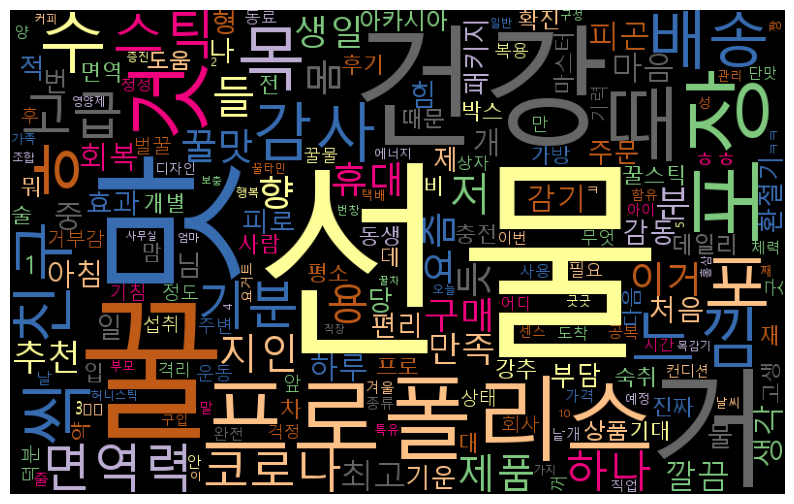

In [44]:
wc_analysis(kakao_data['token_nouns_bareun'])

Í∞ÄÎ∞© ÌÇ§ÏõåÎìúÍ∞Ä Ìè¨Ìï®Îêú Î¶¨Î∑∞Ïùò Ïö©Ïñ∏+Î™ÖÏÇ¨ ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏãúÍ∞ÅÌôî


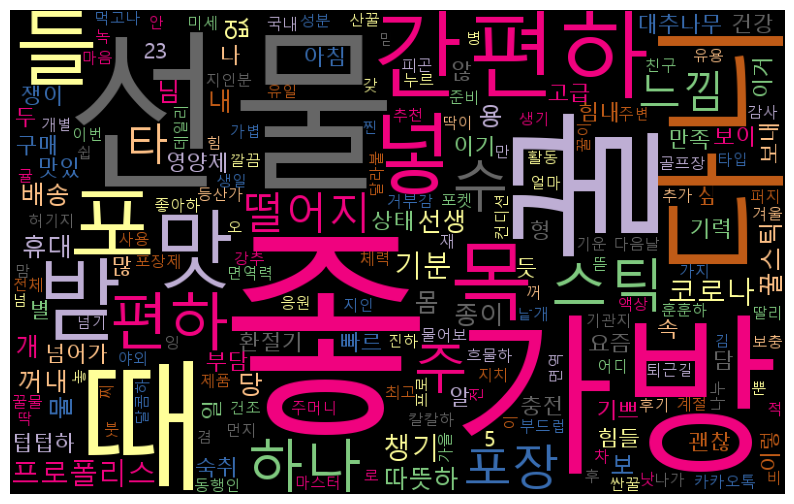

In [118]:
wc_kw(kakao_data, 3, 'Í∞ÄÎ∞©')

In [117]:
kw_in_nouns('Í∞ÄÎ∞©')

' Í∞ÄÎ∞© ' Í∞Ä Ìè¨Ìï®Îêú Î¶¨Î∑∞ Ï¥ù 20 Í±¥


0                                                                                                                                                                                                                                                  ÏàôÏ∑®ÌõÑ ÏïÑÏπ®Ïóê Îî∞ÎúªÌïú Î¨ºÏóê ÌïúÌè¨ Í∞ÑÌé∏Ìûà ÌÉÄÎ®πÏùÑÏàò ÏûàÏñ¥ÏÑú Ï¢ãÎìúÎùºÍµ¨Ïöî. Ïä§Ìã±ÌòïÏù¥Îùº Ìú¥ÎåÄÎèÑÍ∞ÑÌé∏ÌïòÍ≥†  Î¨ºÏóêÎèÑ ÏûòÎÖπÏïÑÏöî. Ï£ºÎ®∏ÎãàÎÇò Í∞ÄÎ∞©ÏïàÏóê Ìú¥ÎåÄÌïòÍ∏∞ÎèÑÍ∞ÑÌé∏Ìï¥ÏÑú ÌóàÍ∏∞Ï°åÏùÑÎïå Í∞ÑÌé∏ÌïòÍ≤å ÎãπÏ∂©Ï†ÑÌïòÍ∏∞ÏóêÎèÑ ÎÑàÎ¨¥Ï¢ãÏäµÎãàÎã§. Íµ≠ÎÇ¥ÏÇ∞ÍøÄÏù¥Îùº ÎØøÏùÑÏàòÏûàÍ≥† ÎßõÎèÑÏ¢ãÏïÑÏöî. Î∞∞ÏÜ°ÏóÑÏ≤≠Îπ†Î•¥ÎÑ§Ïöî
46                                                                                                                                                                                        ÎØ∏ÏÑ∏Î®ºÏßÄÎßéÏùÄ ÏöîÏ¶òÍ∞ôÏùÄ ÌôòÏ†àÍ∏∞Ïóê Îî∞ÎúªÌïòÍ≤å ÌïúÌè¨ Î¨ºÏóê ÌÉÄÎ®πÏúºÎ©¥ ÏπºÏπºÌï¥ÏßÑ Î™© Í±¥Í∞ïÏóê Ï¢ãÎçîÎùºÍµ¨Ïöî.Ìï≠ÏÉÅ ÏüÅÏó¨ÎëêÍ≥† ÏàòÏãúÎ°ú Î®πÍ≥† ÏûàÏñ¥Ïöî. Ïä§Ìã±ÌòïÏù¥Îùº Í∞ÑÌé∏Ìï¥ÏÑú Í∞ÄÎ∞© 

Ïö©Ïñ∏ Ï†úÍ±∞

In [109]:
rm_nouns = ['Í≤É', 'Ïî©', '„Öé', 'Í±∞', 'Ï†Ä', '„Öé„Öé']

In [110]:
kakao_data['token_nouns_bareun'] = kakao_data['token_nouns_bareun'].apply(lambda x:[token for token in x if token not in rm_nouns])

In [112]:
rm_verbs = ['Ìïò', 'Ïù¥', 'Ïûà', 'Î®π', 'Í∞ô', 'Îêò', 'Ïä§ÎüΩ', 'ÏßÄ']

In [113]:
kakao_data['token_verbs_bareun'] = kakao_data['token_verbs_bareun'].apply(lambda x:[token for token in x if token not in rm_verbs])

In [69]:
kakao_data['token_verbs_bareun'][0]

['Îî∞ÎúªÌïò',
 'ÌÉÄ',
 'Î®π',
 'Ïûà',
 'Ï¢ã',
 'Ïù¥',
 'Í∞ÑÌé∏Ìïò',
 'ÎÖπ',
 'Ìïò',
 'Í∞ÑÌé∏Ìïò',
 'ÌóàÍ∏∞ÏßÄ',
 'Í∞ÑÌé∏Ìïò',
 'Ìïò',
 'Ï¢ã',
 'Ïù¥',
 'ÎØø',
 'Ïûà',
 'Ï¢ã',
 'Îπ†Î•¥']

In [120]:
kakao_friend = kakao_data[kakao_data['review_tag2']=='ÏπúÍµ¨']

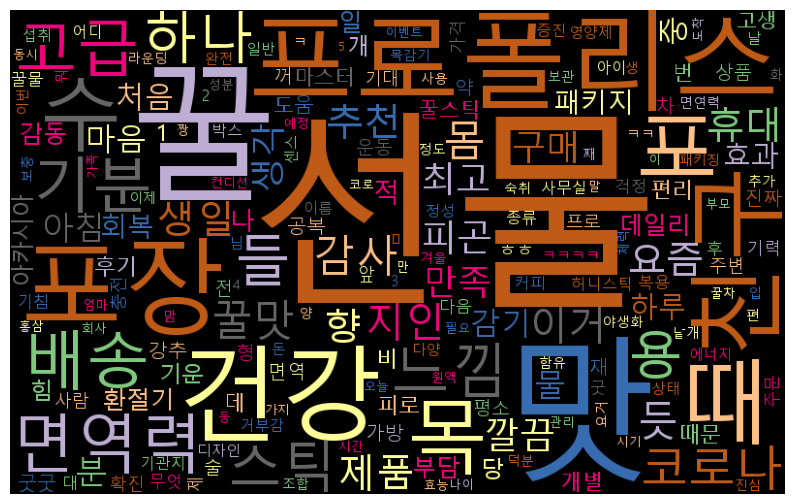

In [124]:
wc_analysis(kakao_friend['token_nouns_bareun'])

In [ ]:
frequency_analysis(kakao_friend['token_nouns_bareun'], 500)

In [ ]:
kakao_data['']

### Î∂ÄÏ†ïÎ¶¨Î∑∞ Î∂ÑÏÑù

In [21]:
kurly_data = pd.read_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\kurly_data_preprocessed.csv", index_col=0)
workerbee_data = pd.read_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\workerbee_data_preprocessed.csv", index_col=0)

In [48]:
workerbee_data = pd.read_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\workerbee_data_preprocessed.csv", index_col=0)

In [36]:
kurly_data['token_nouns_bareun'] = kurly_data['token_nouns_bareun'].apply(lambda x:eval(x))
kurly_data['token_verbs_bareun'] = kurly_data['token_verbs_bareun'].apply(lambda x:eval(x))

In [50]:
workerbee_data['token_nouns_bareun'] = workerbee_data['token_nouns_bareun'].apply(lambda x:eval(x))
workerbee_data['token_verbs_bareun'] = workerbee_data['token_verbs_bareun'].apply(lambda x:eval(x))

Ïª¨ÎüºÎ™Ö ÎßûÏ∂∞Ï£ºÍ∏∞ : Î¶¨Î∑∞, ÏãúÍ∞Ñ

In [84]:
workerbee_data.rename(columns={'contents':'ReviewText', 'insertTimestamp':'ReviewTime',
                               'itemNo':'ProductCode', 'itemName':'ProductName'}, inplace=True)

In [30]:
kurly_data.rename(columns={'ReviewDate':'ReviewTime'}, inplace=True)

In [82]:
kakao_data.rename(columns={'review_time':'ReviewTime', 'id':'ProductCode', 'name':'ProductName'}, inplace=True)

Î∂àÏö©Ïñ¥ Ï†úÍ±∞

In [38]:
rm_nouns = ['Í≤É', 'Ïî©', '„Öé', 'Í±∞', 'Ï†Ä', '„Öé„Öé', 'Îì§']

In [ ]:
kakao_data['token_nouns_bareun'] = kakao_data['token_nouns_bareun'].apply(lambda x:[token for token in x if token not in rm_nouns])

In [39]:
rm_verbs = ['Ìïò', 'Ïù¥', 'Ïûà', 'Î®π', 'Í∞ô', 'Îêò', 'Ïä§ÎüΩ', 'ÏßÄ']

In [ ]:
kakao_data['token_verbs_bareun'] = kakao_data['token_verbs_bareun'].apply(lambda x:[token for token in x if token not in rm_verbs])

In [52]:
for data in [kurly_data, workerbee_data, kakao_data]:
    data['token_nouns_bareun'] = data['token_nouns_bareun'].apply(lambda x:[token for token in x if token not in rm_nouns])
    data['token_verbs_bareun'] = data['token_verbs_bareun'].apply(lambda x:[token for token in x if token not in rm_verbs])

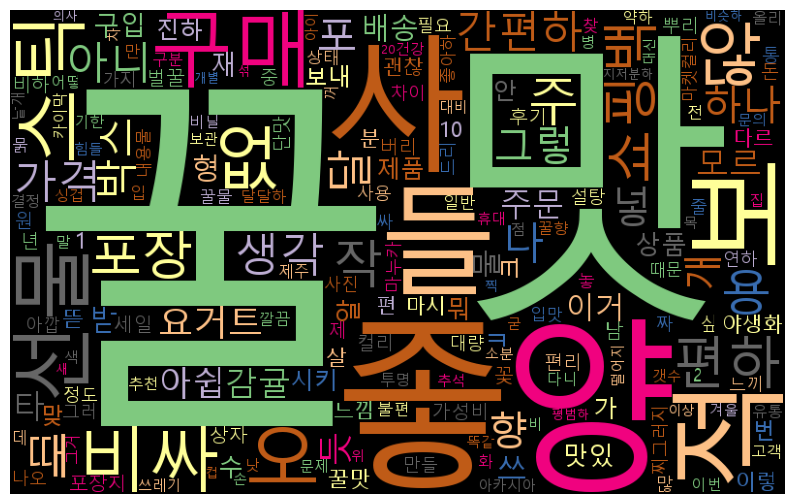

In [42]:
wc_analysis(kurly_data[kurly_data['sentiment_label']==0]['token_nouns_bareun'] + kurly_data[kurly_data['sentiment_label']==0]['token_verbs_bareun'])

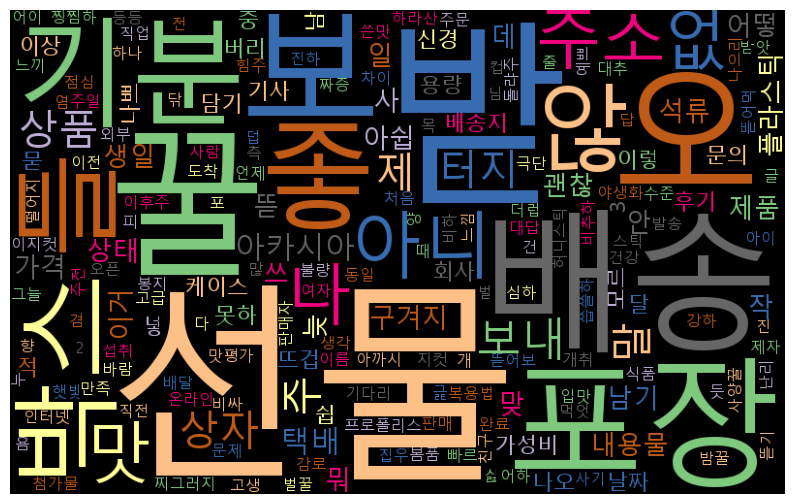

In [43]:
wc_analysis(kakao_data[kakao_data['sentiment_label']==0]['token_nouns_bareun'] + kakao_data[kakao_data['sentiment_label']==0]['token_verbs_bareun'])

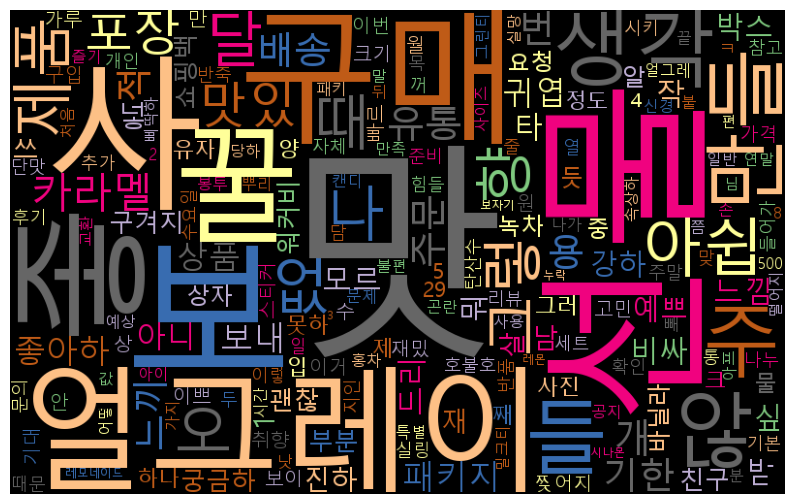

In [54]:
wc_analysis(workerbee_data[workerbee_data['sentiment_label']==0]['token_nouns_bareun'] + workerbee_data[workerbee_data['sentiment_label']==0]['token_verbs_bareun'])

In [19]:
kakao_data[kakao_data['sentiment_label']==0]['ReviewText']

193     ÏÉÅÌíàÏùÄ ÏïÑÏßÅ ÏÑ≠Ï∑®Ï†Ñ..  Îú®Í±∞Ïö¥ Ï†êÏã¨Ïóê ÌñáÎπõÏ®çÌï¥ÏÑú Î∞ïÏä§Í∞Ä ÎßéÏù¥ Îú®Í±∞Ïö¥Îç∞ ÏïàÏóêÎì† ÍøÄÏùÄ...
343     ÏïÑÍπåÏãú Í∞êÎ°ú Ìîº ÎåÄÏ∂î ÏïºÏÉùÌôî Îì±Îì± Î≥ÑÏùòÎ≥Ñ ÍøÄÏùÑ Îã§ Î®πÏñ¥Î¥§ÏßÄÎßå Î∞§ÍøÄÎ≥¥Îã§ Ïì¥ÎßõÏù¥ Í∞ïÌïú ...
468         ÌõÑÍ∏∞ Ïù¥ÌõÑÏ£ºÎäî ÏÉÅÌíàÏùÄ ÏôÑÏ†Ñ Îã§Î•∏Í±∏ Ï£ºÎÑ§Ïöî? „Ö†.  ÏÇ¨Í∏∞ÎßûÏùÄÎìØ Ìïú  Í∏∞Î∂ÑÎçîÎüΩÏäµÎãàÎã§.
643          Îã§Î•∏ Ï≤®Í∞ÄÎ¨ºÏóÜÏù¥ ÍøÄÍ≥º ÌîÑÎ°úÌè¥Î¶¨Ïä§Îßå Îì§Ïñ¥ÏûàÏñ¥ Í±¥Í∞ïÌïòÍ≥† ÏßÑÌïúÎßõ ÏïÑÏù¥Îäî Î®πÍ∏∞ Ïã´Ïñ¥Ìï®.
1040                                Î∞∞ÏÜ°Îπ®ÎûêÏñ¥Ïöî Ìè¨Ïû•ÏùÄ Í∏ÄÏºÄÎßâ..ÏòàÏÅòÏßÑÏïäÏùå
1079                                   „Ö°„Ö°ÎÇòÏúºÎ¶¨ ÍøÄÏù¥ ÎÑàÎ¨¥Îã¨ÎãàÎã§Ïöî ÏóêÏóê
1112              Í∞ÄÏÑ±ÎπÑÎäî ÎßåÏ°±, Î∞∞ÏÜ°ÏùÄ ÎèôÏùºÎÇ†Ïßú 2Í±¥Ïùò ÏÑ†Î¨ºÏùÑ Î∞úÏÜ° ÌñàÎäîÎç∞ Ï´å Îä¶Í≤å Ïò¥
1122                                          „Ö†„Ö† Ïûò Ïïà Î®πÏñ¥Ï†∏ÏòÅ
1128                                ÏÉÅÌíà ÏïàÏôîÏäµÎãàÎã§. Ïôú Î∞∞ÏÜ° ÏôÑÎ£åÏù∏Í±∞Ï£†?
1169                                           ÏûòÎ∞

In [57]:
workerbee_data[workerbee_data['sentiment_label']==0]['ReviewText']

14      ÏÉùÍ∞ÅÎ≥¥Îã§ Ï†úÏûÖÎßõÏóêÎäî Î≥ÑÎ°ú,, Í∑ºÎç∞ ÏπúÍµ¨Îäî ÎßõÏûàÎã§Í≥† ÌïòÎçîÎùºÍ≥†Ïöî ÏπúÍµ¨ Îã§ Ï§¨ÏäµÎãàÎã§,,„Ö†...
25                                        ÏñºÍ∑∏Î†àÏù¥ Ìñ•Ïù¥ ÍΩ§ Í∞ïÌï¥Ïöî..
47      Í∂ÅÍ∏àÌï¥ÏÑú ÏÇ¨Î¥§Ïñ¥Ïöî!! ÏÉùÍ∞ÅÎ≥¥Îã§ ÏñºÍ∑∏Î†àÏù¥ Ìñ•Ïù¥ Í∞ïÌï¥Ïöî„Öé„Öé Îã§Ïãú ÏÇ¨Î®πÏùÑ Í±∞ Í∞ôÏßÑ ÏïäÏïÑÏöî...
52      Ïú†ÌÜµÍ∏∞ÌïúÏù¥ Ï¥âÎ∞ïÌï¥Ïöî.  ÎÇ¥ÏùºÎ™®Î†àÎ©¥ 5ÏõîÏù∏Îç∞ Ïú†ÌÜµÍ∏∞ÌïúÏù¥ 8ÏõîÍπåÏßÄÏù∏ Ï†úÌíàÏù¥ ÏôîÏñ¥Ïöî. Îëê...
58      ÏÑ†Î¨ºÏöòÏúºÎ°úÎäî Í¥úÏ∞ÆÏùÄÎç∞ ÏÜîÏßÅÌûà ÎÑàÎ¨¥Îã¨ÏïÑÏöî Îã® Í±∞ Ï¢ãÏïÑÌïòÎäî Ìé∏Ïù∏Îç∞ÎèÑ Î±âÍ≥† Ïã∂ÏóàÏñ¥Ïó¨ Í∑∏ÎÉ•...
                              ...                        
4790    Íµ¨ÏÑ±ÌíàÏ§ë Ïπ¥ÎùºÎ©úÏùÄ ÎßõÏûàÏóàÏñ¥Ïöî ÍøÄÏùÄ ÏïåÏàòÏóÜÎäî ÍπåÎßåÍ∞ÄÎ£®Í∞Ä ÏûàÏñ¥  ÎÉÑÏÉàÎßå Îß°Í≥† Î∞©Ïπò  ÌÜµ...
4827    ÏÉùÍ∞ÅÎ≥¥Îã§ ÎêòÍ≤å ÏûëÎÑ§Ïöî„Ö† ÏÑ†Î¨ºÌï¥ÏïºÌïòÎäîÎç∞ Í≤âÎ≥¥Í∏∞Ïóê ÎêòÍ≤å Î≥ºÌíàÏóÜÏñ¥Î≥¥Ïñ¥Ïöî ÏïÑÏâΩÎÑ§Ïöî ÍøÄÎ°ú ÏÇ¥...
4975                                   ÎπÑÏãºÌé∏Ïù∏Í±∞ Í∞ôÏïÑÏöî ÎÑàÎ¨¥ ÏûëÎçîÎùºÍ≥†Ïöî
5071    ÏÑ†ÏÉù

In [89]:
workerbee_data.to_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\workerbee_data_preprocessed.csv")

In [90]:
kurly_data.to_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\kurly_data_preprocessed.csv")

In [91]:
kakao_data.to_csv(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\kakao_data_preprocessed.csv")

In [68]:
kakao_data.head(1)

id                                        name brand  sellingPrice  \
0  2270784  Íµ≠ÏÇ∞ ÌîÑÎ°úÌè¥Î¶¨Ïä§ ÌòºÌï© Ï≤úÏó∞Î≤åÍøÄ ÌóàÎãàÏä§Ìã±(15Ïä§Ìã±) ÎãµÎ°ÄÌíà ÎπÑÎßàÏä§ÌÑ∞ -23.5  ÎπÑÎßàÏä§ÌÑ∞         27800   

   wishCount  reviewCount product_tag2  \
0       2228         1152           []   

                                          ReviewText  rating review_tag1  \
0  ÏàôÏ∑®ÌõÑ ÏïÑÏπ®Ïóê Îî∞ÎúªÌïú Î¨ºÏóê ÌïúÌè¨ Í∞ÑÌé∏Ìûà ÌÉÄÎ®πÏùÑÏàò ÏûàÏñ¥ÏÑú Ï¢ãÎìúÎùºÍµ¨Ïöî. Ïä§Ìã±ÌòïÏù¥Îùº Ìú¥ÎåÄ...       4          ÏùëÏõê   

  review_tag2           ReviewTime  sentiment_label  sentiment_score  \
0        ÏßÅÏû•ÎèôÎ£å  2023-04-10 14:16:48                1         0.990664   

                                  token_nouns_bareun  \
0  [ÏàôÏ∑®, ÌõÑ, ÏïÑÏπ®, Î¨º, Ìè¨, Ïàò, Ïä§Ìã±, Ìòï, Ìú¥ÎåÄ, Î¨º, Ï£ºÎ®∏Îãà, Í∞ÄÎ∞©, Ïïà,...   

                                token_verbs_bareun  
0  [Îî∞ÎúªÌïò, ÌÉÄ, Ï¢ã, Í∞ÑÌé∏Ìïò, ÎÖπ, Í∞ÑÌé∏Ìïò, ÌóàÍ∏∞ÏßÄ, Í∞ÑÌé∏Ìïò, Ï¢ã, ÎØø, Ï¢ã, Îπ†Î•¥]

In [110]:
kakao_neg = kakao_data[kakao_data['sentiment_label']==0][['ProductCode', 'ProductName', 'ReviewText', 'ReviewTime',
                                                      'sentiment_label', 'sentiment_score', 'token_nouns_bareun', 'token_verbs_bareun']]
kakao_neg['platform'] = 'kakao'

In [72]:
kurly_data.head(1)

ProductCode MemberGrade MemberName          ProductName  \
0      5136210          ÏùºÎ∞ò        Î∞ï**  [Î∞îÎ°úÏÉùÌôú] ÏïÑÏπ¥ÏãúÏïÑÍøÄ Ïä§Ìã± 10Ìè¨   

                                          ReviewText  ReviewTime  ReviewLike  \
0  ÏûëÏùÄ Î∞ïÏä§Î°ú 2Í∞ú (10Í∞úÏî© Îì§Ïñ¥ÏûàÏñ¥ 20Í∞ú ÎÑ§Ïöî ) Ï£ºÎ¨∏ ÌñàÏäµÎãàÎã§.  ÏùòÏã¨Ïù¥ ÎßéÏùÄ...  2023.06.23           0   

   sentiment_label  sentiment_score  \
0                1          0.99409   

                                  token_nouns_bareun  \
0  [Î∞ïÏä§, 2, Í∞ú, 10, Í∞ú, 20, Í∞ú, ÎÑ§, Ï£ºÎ¨∏, ÏùòÏã¨, ÌÉÄÏûÖ, Î≠ê, Î≤à, ...   

                                  token_verbs_bareun  
0  [Ïûë, Îì§, Îßé, ÏóÜ, Î≥¥, Ïì∞, Î≥¥, ÎÇò, ÏóÜ, ÎßèÏïÑÎ≥¥, ÌûòÎì§, Î∞òÍ∞ë, ÏòàÏÅò, Î≥¥...

In [111]:
kurly_neg = kurly_data[kurly_data['sentiment_label']==0][['ProductCode', 'ProductName', 'ReviewText', 'ReviewTime',
                                                      'sentiment_label', 'sentiment_score', 'token_nouns_bareun', 'token_verbs_bareun']]
kurly_neg['platform'] = 'kurly'

In [113]:
workerbee_neg.head(1)

ProductCode                 ProductName  \
14      1308881  [ÍøÄÏπ¥ÎùºÎ©ú] ÏõåÏª§ÎπÑ ÌóàÎãà ÏñºÍ∑∏Î†àÏù¥ Ïπ¥ÎùºÎ©ú 50g   

                                           ReviewText           ReviewTime  \
14  ÏÉùÍ∞ÅÎ≥¥Îã§ Ï†úÏûÖÎßõÏóêÎäî Î≥ÑÎ°ú,, Í∑ºÎç∞ ÏπúÍµ¨Îäî ÎßõÏûàÎã§Í≥† ÌïòÎçîÎùºÍ≥†Ïöî ÏπúÍµ¨ Îã§ Ï§¨ÏäµÎãàÎã§,,„Ö†...  2023-06-29 19:31:32   

    sentiment_label  sentiment_score       token_nouns_bareun  \
14                0         0.581707  [ÏÉùÍ∞Å, Ï†úÏûÖ, Îßõ, ÏπúÍµ¨, ÏπúÍµ¨, Í∏∞ÎåÄ]   

   token_verbs_bareun   platform  
14            [ÎßõÏûà, Ï£º]  workerbee

In [109]:
workerbee_neg = workerbee_data[workerbee_data['sentiment_label']==0][['ProductCode', 'ProductName', 'ReviewText', 'ReviewTime',
                                                      'sentiment_label', 'sentiment_score', 'token_nouns_bareun', 'token_verbs_bareun']]
workerbee_neg['platform'] = 'workerbee'

In [114]:
neg_review = pd.concat([kurly_neg, workerbee_neg, kakao_neg])

In [116]:
neg_review.to_excel(r"C:\Users\NT550-048\Desktop\doeat\doeat2023\KYJ\honey_stick\data\negative_review.xlsx")

In [118]:
neg_review['platform'].value_counts()

platform
kurly        580
workerbee    145
kakao         41
Name: count, dtype: int64

In [126]:
neg_review[neg_review['sentiment_score']>0.9]

ProductCode                                        ProductName  \
205       5136210                                [Î∞îÎ°úÏÉùÌôú] ÏïÑÏπ¥ÏãúÏïÑÍøÄ Ïä§Ìã± 10Ìè¨   
209       5136210                                [Î∞îÎ°úÏÉùÌôú] ÏïÑÏπ¥ÏãúÏïÑÍøÄ Ïä§Ìã± 10Ìè¨   
214       5136210                                [Î∞îÎ°úÏÉùÌôú] ÏïÑÏπ¥ÏãúÏïÑÍøÄ Ïä§Ìã± 10Ìè¨   
343       5136210                                [Î∞îÎ°úÏÉùÌôú] ÏïÑÏπ¥ÏãúÏïÑÍøÄ Ïä§Ìã± 10Ìè¨   
413       5136210                                [Î∞îÎ°úÏÉùÌôú] ÏïÑÏπ¥ÏãúÏïÑÍøÄ Ïä§Ìã± 10Ìè¨   
...           ...                                                ...   
1858      5620838  ÎØ∏ÏóòÎìú Íµ≠ÎÇ¥ÏÇ∞ 100% Ï≤úÏó∞ Î≤åÍøÄ no.5 ÌòºÌï©ÏÑ†Î¨ºÏÑ∏Ìä∏ (ÌóàÎãàÏä§Ìã±+Î≥ëÍøÄ / Í≤∞ÌòºÏãù,...   
1864      2184492             "ÌïòÎ£®1Ìè¨ ÏïºÏÉùÌôîÎ≤åÍøÄ" ÌóàÎãàÌã∞ÌÜ° 100%Íµ≠ÎÇ¥ÏÇ∞  Ï≤úÏó∞Î≤åÍøÄÏä§Ìã±(20Ìè¨)   
1887      2184488        (1+1/Ï¥ù40Ìè¨) "ÌïòÎ£®1Ìè¨ ÏïºÏÉùÌôîÎ≤åÍøÄ" ÌóàÎãàÌã∞ÌÜ° 100%Íµ≠ÎÇ¥ÏÇ∞ Ï≤úÏó∞Î≤åÍøÄÏä§Ìã±   
1901      6651221                ÎÅåÎ†àÎ•¥ÌóàÎãà Ïä§Ìã± Ï≤úÏó∞Î≤åÍøÄ ÏïÑÏπ¥ÏãúÏïÑÍøÄ ÏïºÏÉùÌôîÍøÄ Î∞§ÍøÄ 36Ìè¨ ÏÑ†Î¨ºÏö©   
1910      2498998           Îã¨Îã¨Ìïú ÏÑ†Î¨º [ÍøÄÎßàÏã§] Î∞§ÍøÄ 12g x 10Ìè¨ - Ï≤úÏó∞Î≤åÍøÄ Îç∞ÏùºÎ¶¨ÎØ∏ÎãàÏä§Ìã±   

                                             ReviewText           ReviewTime  \
205                           ÎëêÎ≤àÏß∏ Íµ¨ÏûÖÏù∏Îç∞ Ïù¥Î≤àÏóî ÏÇ¥Ïßù ÎπÑÎ¶øÌïú ÎßõÏù¥ .            2023.05.30   
209                                Ìñ•Ï¢Ä ÏïàÎÇòÏÑú Ï†ÄÎäî Ïû¨Íµ¨Îß§ ÏïàÌï†Í±∞Í∞ÄÌÉÄÏö§           2023.05.29   
214                           ÏïÑÏπ¥ÏãúÏïÑ Ìñ•Ïù¥ ÏßôÏßÄ ÏïäÏïÑÏöî. ÏÇ¨ÏñëÎ≤åÍøÄÏù∏Í∞ÄÏöî?            2023.05.24   
343                          Ìè¨Ïû•ÏßÄ ÏñëÏóê ÎßûÍ∏∞ ÎßåÎì§Ïñ¥ÏïºÌï® ÎÑàÎ¨¥ Í∏∏Í≤å ÎßåÎì§ÏóàÏùå           2023.04.03   
413                               Ïùå Ïù¥Í±¥ Ï¢Ä ÎπÑÏ∂îÌï†Í≤åÏöî ÎßõÏù¥ÏóÜÏñ¥Ïöî Í∑∏ÎÉ•           2023.03.07   
...                                                 ...                  ...   
1858                      ÎÑàÎ¨¥ Ïö©ÎüâÎì§Ïù¥ ÏûëÏïÑÏÑú Ïã§ÏÜçÏùÄ Í∑∏Îã§ÏßÄ ÏóÜÎäî Í≤É Í∞ôÏïÑÏöî.  2023-01-29 15:50:18   
1864  Ï£ºÏÜå Î∞∞ÏÜ°ÏßÄÎ•º ÏïÑÎ¨¥ Ï£ºÏÜåÎ°ú Î≥¥ÎÇ¥Î©¥ Ïñ¥ÎñªÍ≤åÏó¨?? ÌÉùÎ∞∞ÌöåÏÇ¨Í∞Ä Ï£ºÏÜå Ïù¥ÏÉÅÌïòÎã§Í≥† Ïó∞ÎùΩÎ∞õÏïòÏñ¥...  2020-11-07 12:12:35   
1887             Î≠îÍ∞ÄÌñàÎçîÎãà Ïû°ÍøÄÏù¥ÎÑ§Ïöî..Îã¨Í∏¥ÌïúÎç∞..Ïùå.Íµ≥Ïù¥ ÎÇ¥ÎèàÏ£ºÍ≥† ÏÇ¨Î®πÏùÑÍπåÏã∂ÏùÑÏßÄÎäî.  2020-11-27 20:38:18   
1901                          Ïù¥Í±∞ Ïú†ÌÜµÍ∏∞Ìïú ÏßÄÎÇú Í≤É Í∞ôÏùÄÎç∞ Ïù¥Í≤å ÎßûÎÇòÏöî??  2023-06-10 11:18:02   
1910          Ï†úÍ∞Ä Î®πÏúºÎ†§Í≥† ÏÉÄÎäîÎç∞ ÏùòÏô∏Î°ú Î≥ÑÎ°ú... ÌÉùÎ∞∞ÏÉÅÏûêÎäî Ïù¥ÎîîÏïº(Ïª§ÌîºÏ≤¥Ïù∏) Î≠êÏßÄÏöî  2021-11-12 14:41:50   

      sentiment_label  sentiment_score  \
205                 0         0.988554   
209                 0         0.943153   
214                 0         0.960166   
343                 0         0.985050   
413                 0         0.996495   
...               ...              ...   
1858                0         0.994425   
1864                0         0.996138   
1887                0         0.972345   
1901                0         0.980331   
1910                0         0.980223   

                                     token_nouns_bareun token_verbs_bareun  \
205                                   [Î≤à, Ïß∏, Íµ¨ÏûÖ, Ïù¥Î≤à, Îßõ]              [ÎπÑÎ¶øÌïò]   
209                                      [Ìñ•, Ïû¨, Íµ¨Îß§, ÌÉÄÏö§]                [ÎÇò]   
214                                     [ÏïÑÏπ¥ÏãúÏïÑ, Ìñ•, ÏÇ¨ÏñëÎ≤åÍøÄ]             [Ïßô, Ïïä]   
343                                            [Ìè¨Ïû•ÏßÄ, Ïñë]     [Îßû, ÎßåÎì§, Í∏∏, ÎßåÎì§]   
413                                             [Ïù¥Í±∞, Îßõ]                [ÏóÜ]   
...                                                 ...                ...   
1858                                        [Ïö©Îüâ, Îì§, Ïã§ÏÜç]             [Ïûë, ÏóÜ]   
1864  [Ï£ºÏÜå, Î∞∞ÏÜ°ÏßÄ, Ï£ºÏÜå, ÌÉùÎ∞∞, ÌöåÏÇ¨, Ï£ºÏÜå, Ïù¥ÏÉÅ, Ïó∞ÎùΩ, ÌÉùÎ∞∞, ÌöåÏÇ¨, Ï£ºÏÜå, ...     [Î≥¥ÎÇ¥, Ïñ¥Îñª, Î∞õ, Î∞õ]   
1887                     

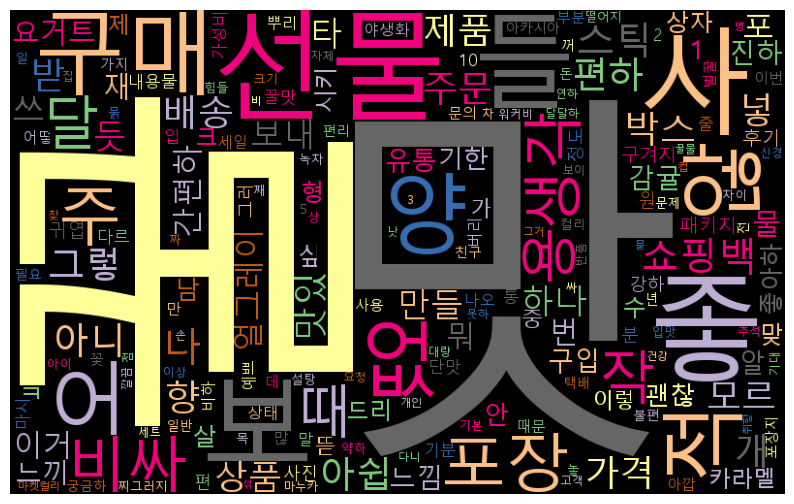

In [97]:
wc_analysis(neg_review['token_nouns_bareun'] + neg_review['token_verbs_bareun'])

In [105]:
frequency_analysis(neg_review['token_nouns_bareun'], 500).head(10)

Token  Frequency
0     Îßõ        182
1     ÍøÄ        172
2    ÏÑ†Î¨º        127
3    Íµ¨Îß§         93
4     Ïñë         87
5    Ìè¨Ïû•         73
6    ÏÉùÍ∞Å         61
7     Ïö©         60
8   ÏáºÌïëÎ∞±         56
9     Îïå         55

Ìè¨Ïû• ÌÇ§ÏõåÎìúÍ∞Ä Ìè¨Ìï®Îêú Î¶¨Î∑∞Ïùò Ïö©Ïñ∏+Î™ÖÏÇ¨ ÏõåÎìúÌÅ¥ÎùºÏö∞Îìú ÏãúÍ∞ÅÌôî


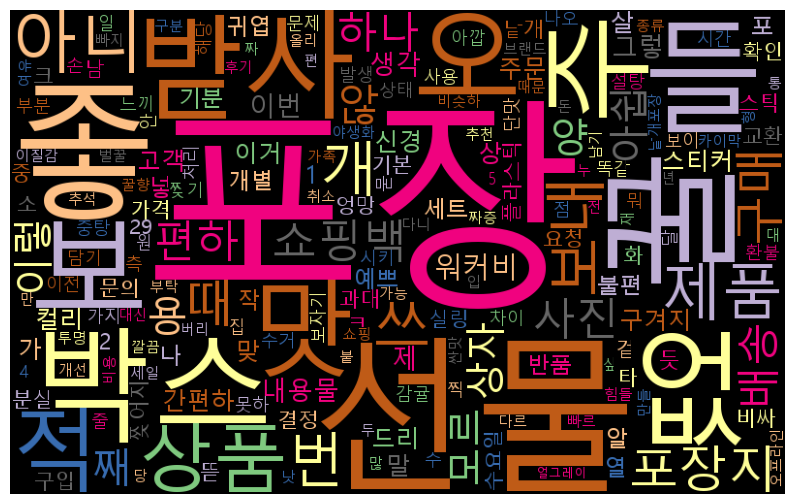

In [108]:
wc_kw(neg_review, 3, 'Ìè¨Ïû•')

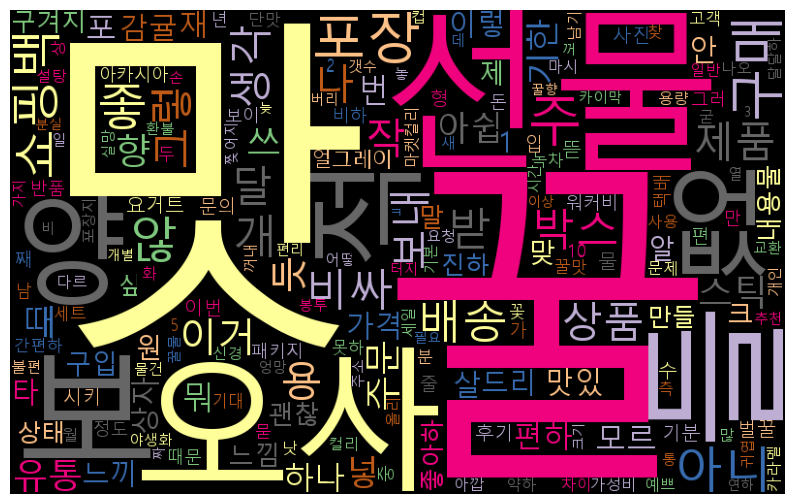

In [127]:
wc_analysis(neg_review[neg_review['sentiment_score']>0.9]['token_nouns_bareun'] + neg_review[neg_review['sentiment_score']>0.9]['token_verbs_bareun'])